<a href="https://colab.research.google.com/github/AlexanderSychev2005/stat_un/blob/main/ml_lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [422]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

In [382]:
np.random.seed(42)
num_of_abit = 1500
max_score = 200
min_score = 100

In [383]:
data = {
    "math_score": np.clip(np.random.normal(160, 20, num_of_abit), min_score, max_score),
    "eng_score": np.clip(np.random.normal(150, 25, num_of_abit), min_score, max_score),
    "ukr_score": np.clip(np.random.normal(150, 22, num_of_abit), min_score, max_score),
    "privileged": np.random.choice([0, 1], num_of_abit, p=[0.9, 0.1])
}

In [384]:
dataset = pd.DataFrame(data)
dataset

,math_score,eng_score,ukr_score,privileged
0,169.934283,169.459027,108.028234,1
1,157.234714,136.220357,131.071530,0
2,172.953771,129.545028,140.900678,0
3,190.460597,149.915639,191.529128,0
4,155.316933,145.745384,162.244169,0
...,...,...,...,...
1495,200.000000,151.937013,186.902296,0
1496,200.000000,156.443814,132.286221,0
1497,184.167325,118.955986,173.690659,0
1498,180.481251,158.354410,102.267097,0


In [385]:
dataset.to_csv('dataset.csv', index=False)

In [386]:
dataset = pd.read_csv('dataset.csv')

In [387]:
dataset['rating'] = 0.4 * dataset['math_score'] + 0.3 * dataset['eng_score'] + 0.3 * dataset['ukr_score']

In [388]:
dataset

,math_score,eng_score,ukr_score,privileged,rating
0,169.934283,169.459027,108.028234,1,151.219891
1,157.234714,136.220357,131.071530,0,143.081452
2,172.953771,129.545028,140.900678,0,150.315220
3,190.460597,149.915639,191.529128,0,178.617669
4,155.316933,145.745384,162.244169,0,154.523639
...,...,...,...,...,...
1495,200.000000,151.937013,186.902296,0,181.651793
1496,200.000000,156.443814,132.286221,0,166.619010
1497,184.167325,118.955986,173.690659,0,161.460923
1498,180.481251,158.354410,102.267097,0,150.378952


In [389]:
def is_admitted(row):
  if row['privileged'] == 1:
    condition = row['math_score'] > 120 and row['eng_score'] > 120 and row['ukr_score'] > 120 and row['rating'] > 144
    return condition
  else:
    condition = row['rating'] > 160 and row['math_score'] > 140
    return condition


In [390]:
dataset['admitted'] = dataset.apply(is_admitted, axis=1)

In [391]:
dataset

,math_score,eng_score,ukr_score,privileged,rating,admitted
0,169.934283,169.459027,108.028234,1,151.219891,False
1,157.234714,136.220357,131.071530,0,143.081452,False
2,172.953771,129.545028,140.900678,0,150.315220,False
3,190.460597,149.915639,191.529128,0,178.617669,True
4,155.316933,145.745384,162.244169,0,154.523639,False
...,...,...,...,...,...,...
1495,200.000000,151.937013,186.902296,0,181.651793,True
1496,200.000000,156.443814,132.286221,0,166.619010,True
1497,184.167325,118.955986,173.690659,0,161.460923,True
1498,180.481251,158.354410,102.267097,0,150.378952,False


In [392]:
total_slots = 350
privileged_slots = int(total_slots * 0.1)
print("Privileged slots", privileged_slots)
print("Unprivileged slots", total_slots - privileged_slots)

Privileged slots 35
Unprivileged slots 315


In [393]:
privileged = dataset[dataset['privileged'] == 1]
non_privileged = dataset[dataset['privileged'] == 0]

In [394]:
privileged = privileged.sort_values(by='rating', ascending=False)
non_privileged = non_privileged.sort_values(by='rating', ascending=False)

In [395]:
admitted_privileged = privileged[privileged['admitted']].head(privileged_slots)
admitted_non_privileged = non_privileged[non_privileged['admitted']].head(total_slots - len(admitted_privileged))

In [396]:
dataset['admitted'] = dataset.index.isin(admitted_privileged.index) | dataset.index.isin(admitted_non_privileged.index)

In [397]:
dataset

,math_score,eng_score,ukr_score,privileged,rating,admitted
0,169.934283,169.459027,108.028234,1,151.219891,False
1,157.234714,136.220357,131.071530,0,143.081452,False
2,172.953771,129.545028,140.900678,0,150.315220,False
3,190.460597,149.915639,191.529128,0,178.617669,True
4,155.316933,145.745384,162.244169,0,154.523639,False
...,...,...,...,...,...,...
1495,200.000000,151.937013,186.902296,0,181.651793,True
1496,200.000000,156.443814,132.286221,0,166.619010,True
1497,184.167325,118.955986,173.690659,0,161.460923,False
1498,180.481251,158.354410,102.267097,0,150.378952,False


In [398]:
X = dataset[['math_score', 'eng_score', 'ukr_score', 'privileged']]
y = dataset[['admitted']]

In [399]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [400]:
y_test.describe(include="all")

,admitted
count,300
unique,2
top,False
freq,229


In [401]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [402]:
X_train_scaled.shape

(1200, 4)

In [403]:
X_test_scaled.shape

(300, 4)

In [404]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [405]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [406]:
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32,
                   validation_split=0.2, verbose=2)

Epoch 1/50
30/30 - 1s - 48ms/step - accuracy: 0.7292 - loss: 0.6130 - val_accuracy: 0.7917 - val_loss: 0.5156
Epoch 2/50
30/30 - 0s - 4ms/step - accuracy: 0.8125 - loss: 0.4489 - val_accuracy: 0.8750 - val_loss: 0.3456
Epoch 3/50
30/30 - 0s - 5ms/step - accuracy: 0.8667 - loss: 0.3199 - val_accuracy: 0.9167 - val_loss: 0.2476
Epoch 4/50
30/30 - 0s - 3ms/step - accuracy: 0.9083 - loss: 0.2330 - val_accuracy: 0.9167 - val_loss: 0.1918
Epoch 5/50
30/30 - 0s - 5ms/step - accuracy: 0.9271 - loss: 0.1854 - val_accuracy: 0.9417 - val_loss: 0.1536
Epoch 6/50
30/30 - 0s - 3ms/step - accuracy: 0.9292 - loss: 0.1711 - val_accuracy: 0.9292 - val_loss: 0.1361
Epoch 7/50
30/30 - 0s - 5ms/step - accuracy: 0.9552 - loss: 0.1297 - val_accuracy: 0.9333 - val_loss: 0.1240
Epoch 8/50
30/30 - 0s - 3ms/step - accuracy: 0.9563 - loss: 0.1105 - val_accuracy: 0.9458 - val_loss: 0.1050
Epoch 9/50
30/30 - 0s - 3ms/step - accuracy: 0.9563 - loss: 0.1139 - val_accuracy: 0.9750 - val_loss: 0.0807
Epoch 10/50
30/30 

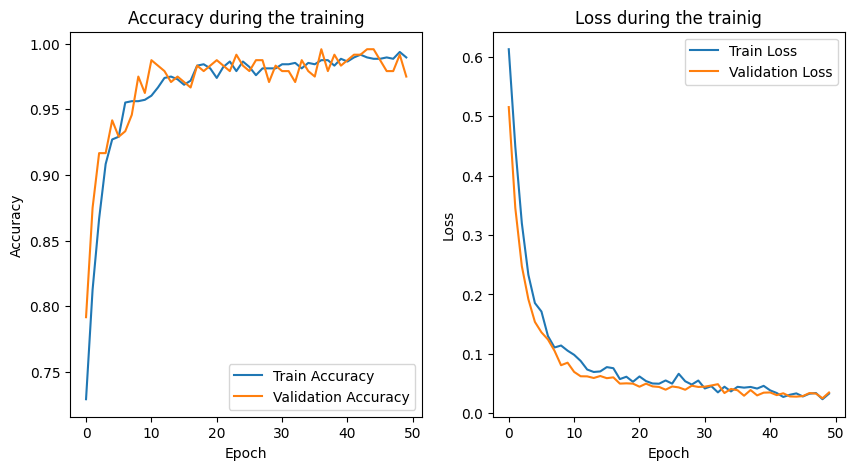

In [407]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Accuracy during the training')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Loss during the trainig')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.show()

In [408]:
model.save('admission_model.h5')

## Testing

In [425]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       1.00      0.99      0.99       229
        True       0.96      1.00      0.98        71

    accuracy                           0.99       300
   macro avg       0.98      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [409]:
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [410]:
print(f"Model accuracy on test data: {accuracy:.4f}")

Model accuracy on test data: 0.9900


## Predicted Admitted

In [411]:
predicted_admitted = np.sum(y_pred)
print(f"Predicted admitted: {predicted_admitted}")

Predicted admitted: 74


## False Positives (incorrectly admitted)

In [412]:
false_positives = X_test[(y_pred.flatten() == 1) & (y_test['admitted'] == 0)]
print(f"False Positives (incorrectly admitted): {len(false_positives)}")
print(false_positives)

False Positives (incorrectly admitted): 3
      math_score   eng_score   ukr_score  privileged
1490  148.962837  187.909851  158.699262           0
999   171.451656  158.501282  157.934254           0
1231  132.603940  192.125357  179.822605           0


## False Negatives (incorrectly rejected)

In [413]:
false_negatives = X_test[(y_pred.flatten() == 0) & (y_test['admitted'] == 1)]
print(f"False Negatives (incorrectly rejected): {len(false_negatives)}")
print(false_negatives)

False Negatives (incorrectly rejected): 0
Empty DataFrame
Columns: [math_score, eng_score, ukr_score, privileged]
Index: []


## Confusion Matrix

In [414]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[226   3]
 [  0  71]]


## Testing admission

In [430]:
new_applicant = np.array([[170, 155, 160, 1]])
new_applicant_scaled = scaler.transform(new_applicant)
prediction = model.predict(new_applicant_scaled)
print(f"Admission probability: {prediction[0][0]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Admission probability: 0.8295


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Anomalous Cases

In [416]:
def is_admitted(row):
  if row['privileged'] == 1:
    condition = row['math_score'] > 120 and row['eng_score'] > 120 and row['ukr_score'] > 120 and row['rating'] > 144
    return condition
  else:
    condition = row['rating'] > 160 and row['math_score'] > 140
    return condition


In [431]:
anomalous_cases = [
    np.array([[200, 200, 200, 0]]),  # Високі бали, непільговик
    np.array([[100, 100, 100, 1]]),  # Низькі бали, пільговик
    np.array([[200, 200, 100, 1]])   # Змішані бали, пільговик
]

for case in anomalous_cases:
    case_scaled = scaler.transform(case)
    pred = model.predict(case_scaled)
    print(f"Anomalous case {case.flatten()}: Admission probability: {pred[0][0]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Anomalous case [200 200 200   0]: Admission probability: 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Anomalous case [100 100 100   1]: Admission probability: 0.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Anomalous case [200 200 100   1]: Admission probability: 0.9993


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Hybrid prediction

In [418]:
def hybrid_predict(X, model, scaler):
    X_scaled = scaler.transform(X)
    y_pred = model.predict(X_scaled)
    y_pred_final = []

    for i in range(len(X)):
        row = X.iloc[i].copy()
        row['rating'] = 0.4 * row['math_score'] + 0.3 * row['eng_score'] + 0.3 * row['ukr_score']
        if is_admitted(row) and y_pred[i] > 0.5:
            y_pred_final.append(1)
        else:
            y_pred_final.append(0)

    return np.array(y_pred_final)

In [419]:
for case in anomalous_cases:
    case_df = pd.DataFrame(case, columns=['math_score', 'eng_score', 'ukr_score', 'privileged'])
    pred = hybrid_predict(case_df, model, scaler)
    print(f"Anomalous case {case.flatten()}: Admission decision: {'Admitted' if pred[0] == 1 else 'Rejected'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Anomalous case [200 200 200   0]: Admission decision: Admitted
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Anomalous case [100 100 100   1]: Admission decision: Rejected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Anomalous case [200 200 100   1]: Admission decision: Rejected


In [428]:
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)


test_results = X_test.copy()
test_results['rating'] = 0.4 * test_results['math_score'] + 0.3 * test_results['eng_score'] + 0.3 * test_results['ukr_score']
test_results['predicted_probability'] = y_pred_prob.flatten()
test_results['predicted_admitted'] = y_pred.flatten()
test_results['actual_admitted'] = y_test['admitted'].values


test_results['difference'] = (test_results['predicted_admitted'] != test_results['actual_admitted']).astype(int)

anomalous_results = []
for case in anomalous_cases:
    case_df = pd.DataFrame(case, columns=['math_score', 'eng_score', 'ukr_score', 'privileged'])
    case_scaled = scaler.transform(case)
    pred_prob = model.predict(case_scaled)


    rating = 0.4 * case[0][0] + 0.3 * case[0][1] + 0.3 * case[0][2]


    anomalous_results.append({
        'math_score': case[0][0],
        'eng_score': case[0][1],
        'ukr_score': case[0][2],
        'privileged': case[0][3],
        'rating': rating,
        'predicted_probability': pred_prob[0][0],
        'predicted_admitted': int(pred_prob[0][0] > 0.5),
        'actual_admitted': np.nan,
        'difference': np.nan
    })


anomalous_results_df = pd.DataFrame(anomalous_results)


results_df = pd.concat([test_results.reset_index(drop=True), anomalous_results_df], ignore_index=True)


results_df.to_csv('model_only_results.csv', index=False)



print("\nСтатистика помилок (difference):")
print(test_results['difference'].value_counts())

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

Статистика помилок (difference):
difference
0    297
1      3
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
